In [3]:
import numpy as np
# 1. 복합 데이터(리스트 또는 튜플, 세트와 딕셔너리는 안됨)로부터 배열 생성
A = np.array([3, 29, 82])
B = np.array(((3., 29, 82), (10, 18, 84)))
C = np.array([[3,29, 82], [10, 18, 84]], dtype=float) # Note: This will cause a warning
D = np.array([3, 29, 'Choi'])
E = np.array([[3], [29], [82]])

print(A.ndim, A.size, A.shape, A.dtype)
# 1 3 (3,) int32
print(B.ndim, B.size, B.shape, B.dtype)
# 2 6 (2, 3) float64
print(C.ndim, C.size, C.shape, C.dtype)
# 1 2 (2,) object (due to lists of different lengths)
print(D.ndim, D.size, D.shape, D.dtype)
# 1 3 (3,) <U11 (유니코드)
# 참고) array(['3', '29', 'Choi'])
print(E.ndim, E.size, E.shape, E.dtype)
# 2 3 (3, 1) int32
# 참고) np.array_equal(E, E.T) == False, E.T는 array([[3, 29, 82]])

1 3 (3,) int64
2 6 (2, 3) float64
2 6 (2, 3) float64
1 3 (3,) <U21
2 3 (3, 1) int64


In [4]:
# 2. 초기화 함수를 사용하여 배열 생성
F = np.zeros((3, 2))
# 0으로 채워진 3x2 배열 생성 (기본: float64)
G = np.ones((3, 2))
# 1로 채워진 3x2 배열 생성
H = np.eye(3, dtype=np.float32)
# 3x3 단위 행렬 생성 (단정밀도)
I = np.empty((3, 2))
# np.zeros((3, 2))와 거의 동일, 초기화되지 않은 값 포함 가능
J = np.empty((0, 9))
# 크기가 (0,9)인 빈 배열 []
K = np.arange(0, 1, 0.2)
# 0.2 간격: array([0. , 0.2, 0.4, 0.6, 0.8])
L = np.linspace(0, 1, 5)
# 5개 샘플: array([0.  , 0.25, 0.5 , 0.75, 1.  ])
M = np.random.random((3, 2))
# np.random.uniform(size=(3, 2))와 동일
# 참고) 정규 분포는 np.random.normal()

In [7]:
print(F)
print(G)
print(H)
print(I)
print(J)  
print(K)
print(L)
print(M)

[[0. 0.]
 [0. 0.]
 [0. 0.]]
[[1. 1.]
 [1. 1.]
 [1. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[9.34577196e-307 9.34598246e-307]
 [1.60218491e-306 1.69119873e-306]
 [1.24611673e-306 1.27950320e-307]]
[]
[0.  0.2 0.4 0.6 0.8]
[0.   0.25 0.5  0.75 1.  ]
[[0.65951959 0.34170769]
 [0.68411541 0.27344342]
 [0.97780056 0.32125642]]


In [ ]:
import numpy as np
A = np.array(((3., 29, 82), (10, 18, 84)))

# 1. 인덱싱과 슬라이싱
A[1, :]       # 행 가져오기: array([10., 18., 84.])
A[:, 2]       # 열 가져오기: array([82., 84.])
A[0:2, 0:2]   # 부분 행렬 가져오기: array([[ 3., 29.], [10., 18.]])

array([18.])

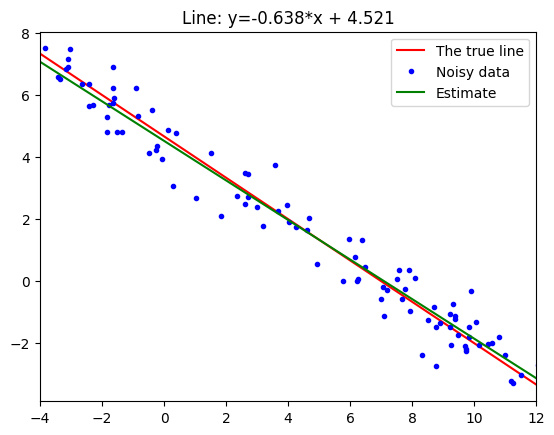

In [10]:
import numpy as np
import matplotlib.pyplot as plt

true_line = lambda x: -2/3*x + 14/3
data_range = np.array([-4, 12])
data_num = 100
noise_std = 0.5

# 실제 데이터 생성
x = np.random.uniform(data_range[0], data_range[1], size=data_num)
y = true_line(x)

# 가우시안 노이즈 추가
xn = x + np.random.normal(scale=noise_std, size=x.shape)
yn = y + np.random.normal(scale=noise_std, size=y.shape)

# 연립 방정식 풀기
A = np.vstack((xn, np.ones(xn.shape))).T # .T는 전치(transpose)
b = yn
line = np.linalg.pinv(A) @ b # [a, b] 계수

# 데이터와 결과 플로팅
plt.title(f'Line: y={line[0]:.3f}*x + {line[1]:.3f}')
plt.plot(data_range, true_line(data_range), 'r-', label='The true line')
plt.plot(xn, yn, 'b.', label='Noisy data')
plt.plot(data_range, line[0]*data_range + line[1], 'g-', label='Estimate')
plt.xlim(data_range)
plt.legend()
plt.show()

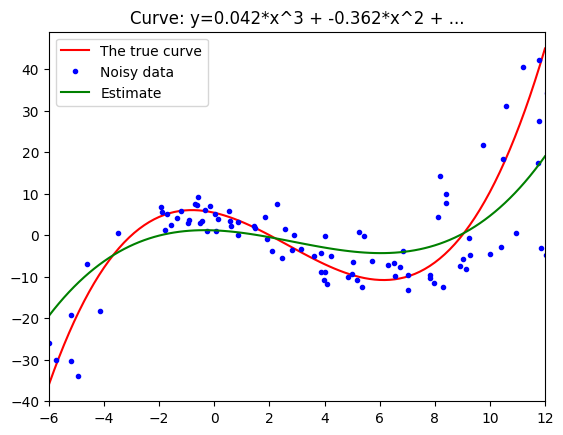

In [11]:
import numpy as np
import matplotlib.pyplot as plt

true_curve = lambda x: 0.1*x**3 - 0.8*x**2 - 1.5*x + 5.4
data_range = (-6, 12)
data_num = 100
noise_std = 1.5 # Noise increased for better visualization

# 데이터 생성 및 노이즈 추가
x = np.random.uniform(data_range[0], data_range[1], size=data_num)
y = true_curve(x)
xn = x + np.random.normal(scale=noise_std, size=x.shape)
yn = y + np.random.normal(scale=noise_std, size=y.shape)

# 연립 방정식 풀기
A = np.vstack((xn**3, xn**2, xn, np.ones(xn.shape))).T
b = yn
curve = np.linalg.pinv(A) @ b # [a, b, c, d] 계수

# 결과 플로팅
plt.title(f'Curve: y={curve[0]:.3f}*x^3 + {curve[1]:.3f}*x^2 + ...')
xc = np.linspace(*data_range, 100)
plt.plot(xc, true_curve(xc), 'r-', label='The true curve')
plt.plot(xn, yn, 'b.', label='Noisy data')
plt.plot(xc, curve[0]*xc**3 + curve[1]*xc**2 + curve[2]*xc + curve[3], 'g-', label='Estimate')
plt.xlim(data_range)
plt.legend()
plt.show()